# Study of Real Estate Listings

You have access to data from the Yandex.Real Estate service, containing archives of apartment sales listings in St. Petersburg and surrounding areas spanning several years. The objective is to develop the ability to accurately determine the market value of real estate properties. Your task is to establish parameters for this purpose, which will facilitate the creation of an automated system capable of detecting anomalies and fraudulent activities.

Each apartment listing includes two types of data. The first type is entered by users, while the second type is obtained automatically from cartographic data sources. This includes information such as distance to the city center, airport, nearest park, and bodies of water.

## Data Analysis from File

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Let's display general information about apartment prices in millions of rubles.

In [2]:
print((df['last_price'] / 1000000).describe())

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


Let's check for any obvious duplicates.

In [3]:
print(df.duplicated().sum())

0


Let's examine the proportion of missing values in each column.

In [4]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

### Conclusion

From the information provided, it's evident that some columns contain missing values. We'll proceed to address them.

The following data type changes are needed for the columns:
- `last_price`, `floors_total`, `balcony` - to integer
- `first_day_exposition` - to date format

Regarding the price description, there's a considerable price range. The cheapest apartment is priced at approximately 12,000 rubles, while the most expensive one is around 763 million rubles. The average apartment price is 6.5 million rubles.

No obvious duplicates were found.

Analysis of missing values indicates that some columns have missing values exceeding 50%. We'll address these missing values in the relevant columns.

## Data Preprocessing

In the column `is_apartment`, there are many missing values. Let's assume that all missing values indicate that the properties are not apartments. Therefore, we'll replace all these missing values with False.

In [5]:
df['is_apartment'] = df['is_apartment'].fillna(False)

If a value is missing in the `balcony` column, it's likely that there is no balcony. Let's replace all missing values with 0.

In [6]:
df['balcony'] = df['balcony'].fillna(0)

There are few missing values in the `floors_total` column, so we can assume that all missing values in this column are equal to the corresponding values in the `floor` column.

In [7]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

There are many missing values in the `ceiling_height` column. Let's replace these missing values with the most frequent value in this column.

In [8]:
df['ceiling_height'].value_counts().head()

2.5    3515
2.6    1646
2.7    1574
3.0    1112
2.8     993
Name: ceiling_height, dtype: int64

We can see that the majority of apartments have a ceiling height of 2.5 meters. Let's replace all missing values in this column with 2.5 meters.

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

In the columns `last_price`, `balcony`, and `floors_total`, we'll change the data type to `int64`. For the `is_apartment` column, we'll change the data type to `bool`.

In [11]:
df[['last_price', 'balcony', 'floors_total']] = df[['last_price', 'balcony', 'floors_total']].astype(int)
df['is_apartment'] = df['is_apartment'].astype(bool)

We'll change the date format in the `first_day_exposition` column.

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

We'll change the data type of the columns `total_area`, `living_area`, and `kitchen_area` from `float64` to `float32` to save memory.

In [13]:
df[['total_area', 'living_area', 'kitchen_area']] = df[['total_area', 'living_area', 'kitchen_area']].astype('float32')

Let's see how many apartments have ceiling heights above 4 meters or below 2 meters.

In [14]:
df_height = df.query('ceiling_height > 4 or ceiling_height < 2')
df_height.shape[0]

78

There are 78 apartments with ceiling heights above 4 meters or below 2 meters. Let's remove them because such apartments could potentially skew the graphs in the future.

In [15]:
df = df.query('ceiling_height >= 2 and ceiling_height <= 4')

Let's see how many apartments have more than 7 rooms.

In [16]:
df_rooms = df.query('rooms > 7')
df_rooms.shape[0]

31

We are deleting it. Such apartments are very rare

In [17]:
df = df.query('rooms <= 7')

### Conclusion

Filled empty values, changed data types and deleted rows with rare values

## Calculations and adding results to the table

Add a column with a valuable 1 square meter

In [18]:
df['one_metr_price'] = (df['last_price'] / df['total_area']).astype(int)

Add columns with information about the date of publication

1. Day of the week

2. Month

3. Year

In [19]:
df['day_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

Now let's add a column with information about the floor. Where there will be three options.

1. Ground floor

2. Top floor

3. Other

To do this, let's write a function

In [20]:
def floor_description_func(floor, floors_total):
    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'


In [21]:
df['floor_description'] = df.apply(lambda x: floor_description_func(x['floor'], x['floors_total']), axis=1)

Let's add two new columns

1. Ratio of living space to total
2. Ratio of kitchen area to total area

In [22]:
df['living_area_ratio'] = df['living_area'] / df['total_area'] * 100
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area'] * 100

Add a column with distance from the center in km

In [23]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round(0)

### Conclusion

Added new columns with the necessary information

## Exploratory data analysis

Let's build histograms for the total area, price, number of rooms and ceiling heights. Let's see what we can already see.

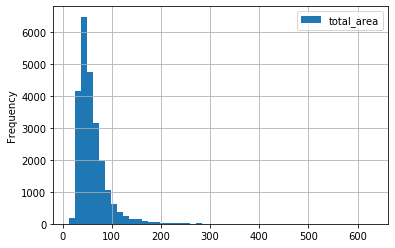

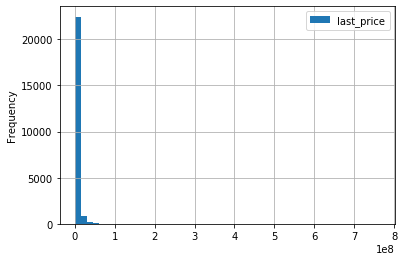

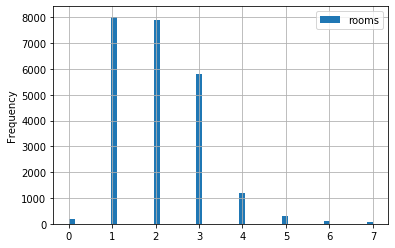

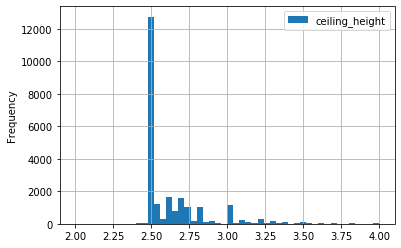

In [24]:
first_hist = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for i in first_hist:
    df.plot(kind='hist', y=i, bins=50, grid=True)


1. The vast majority of apartments with a total area of ​​up to 200 square meters
2. Not everything is clear about the price yet. Next, we will make a schedule with a price of up to 20 million rubles
3. Most apartments have 1 - 3 rooms. Other meanings are rare
4. And ceiling heights range from 2.5m to 3m. Other meanings are not so popular

Let's build a new histogram for the value

But for ease of perception, we will add a new column where the price will be indicated in million rubles

In [25]:
df['last_price_mil'] = df['last_price'] / 1000000

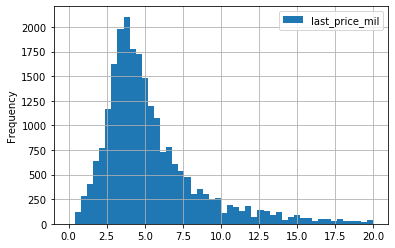

In [26]:
df_last_price_mil = df.query('last_price_mil <= 20')
df_last_price_mil.plot(kind='hist', y='last_price_mil', bins=50, grid=True)

Now we can say that the overwhelming number of apartments are in the range from 2.5 to 5 million rubles

Let's look at the average time to sell an apartment

count    20430.000000
mean       180.405384
std        219.135320
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

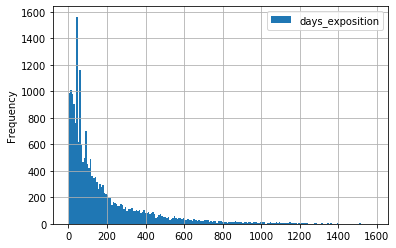

In [27]:
df.plot(kind='hist', y='days_exposition', bins=200, grid=True)
df['days_exposition'].describe()

From the graph above, we note that the bulk of transactions are completed within 100 days.

Let's build a new histogram for the total area of ​​apartments up to 200 m

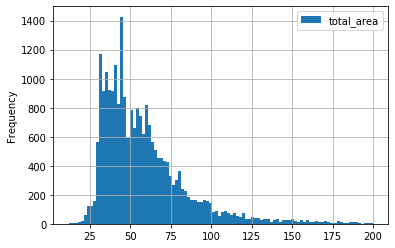

In [28]:
df_total_area_popular = df.query('total_area <= 200')
df_total_area_popular.plot(kind='hist', y='total_area', bins=100, grid=True)

The largest number of apartments have a total area of ​​approximately 30 to 70 square meters

Now we will build a graph for the time of sale of apartments up to 800 days. Because after the values ​​become rare

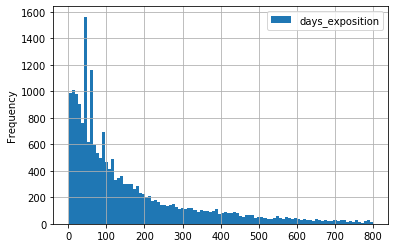

In [29]:
df_days_exposition_popular = df.query('days_exposition <= 800')
df_days_exposition_popular.plot(kind='hist', y='days_exposition', bins=100, grid=True)

Most often, an apartment is sold within 100-200 days

Now let's see if the price of an apartment depends on the area, number of rooms and distance from the center

In [30]:
print(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.634406  0.346283            -0.209986
total_area             0.634406    1.000000  0.751139            -0.233046
rooms                  0.346283    0.751139  1.000000            -0.181586
cityCenters_nearest   -0.209986   -0.233046 -0.181586             1.000000


You can see above that the price is most influenced by the total area. The larger the area and the more rooms, the higher the price of the apartment. Logical. And the further from the center, the cheaper the apartments

Now let's see on which floors the most expensive apartments are

In [31]:
print(df.groupby('floor_description')['last_price_mil'].mean())

floor_description
Другой       6.629277
Первый       4.736709
Последний    6.899457
Name: last_price_mil, dtype: float64


The apartments on the top floor are not much, but nevertheless more expensive than on other floors. The cheapest apartments are on the ground floor

Let's see what time the most expensive apartments are

In [32]:
df_day_all = df.pivot_table(index='day_exposition', values='last_price_mil')
df_month_all = df.pivot_table(index='month_exposition', values='last_price_mil')
df_year_all = df.pivot_table(index='year_exposition', values='last_price_mil')

print(df_day_all)
print()
print(df_month_all)
print()
print(df_year_all)

                last_price_mil
day_exposition                
Friday                6.331354
Monday                6.432392
Saturday              6.876046
Sunday                6.169935
Thursday              6.568719
Tuesday               6.355769
Wednesday             6.378474

                  last_price_mil
month_exposition                
April                   6.666634
August                  6.353054
December                6.650528
February                6.421588
January                 6.482463
July                    6.435779
June                    6.193962
March                   6.279734
May                     6.525790
November                6.421161
October                 6.087175
September               6.778465

                 last_price_mil
year_exposition                
2014                  11.859835
2015                   8.213918
2016                   6.778940
2017                   6.433276
2018                   5.892339
2019                   6.722723


There has been a noticeable drop in apartment prices since 2014. We will also display statistics on the price per square meter

In [33]:
print(df.pivot_table(index='year_exposition', values='one_metr_price'))

                 one_metr_price
year_exposition                
2014              124618.647059
2015              104116.808475
2016               98230.499639
2017               97234.864172
2018               97608.368415
2019              107164.743286


In 2014, prices for apartments really were the highest, then they began to fall. From 2016 to 2018 they remained at approximately the same level. And they grew a little in 2019

1. Apartment advertisements posted on Saturday have the highest average price. But this is more of an accident, because... the difference between the days of the week is minimal
2. Apartment advertisements posted in September have the highest average price
3. Apartment advertisements posted in 2014 have the highest average price

Let's add a new column with information about the price of 1 square meter

In [34]:
df['price_one_metr'] = df['last_price'] / df['total_area']

Let's build a summary and find the average price and number of advertisements in each locality

In [35]:
df_location = df.pivot_table(index='locality_name', values='price_one_metr', aggfunc=['mean', 'count'])
display(df_location.head())

,mean,count
,price_one_metr,price_one_metr
locality_name,,
Бокситогорск,17457.330200,15
Волосово,40183.326053,36
Волхов,35055.143613,110
Всеволожск,68605.573132,397
Выборг,58093.893095,236


Let's rename the columns

In [36]:
df_location.columns = ['one_metr_price_mean', 'count']

We will display 10 settlements with the largest number of advertisements

                   one_metr_price_mean  count
locality_name                                
Санкт-Петербург          114556.963970  15631
посёлок Мурино            85725.241254    520
посёлок Шушары            78677.364183    440
Всеволожск                68605.573132    397
Пушкин                   103058.361327    368
Колпино                   75333.295708    337
посёлок Парголово         90175.913487    327
Гатчина                   68757.678558    306
деревня Кудрово           92473.547479    299
Выборг                    58093.893095    236
AxesSubplot(0.135,0.125;0.755x0.755)


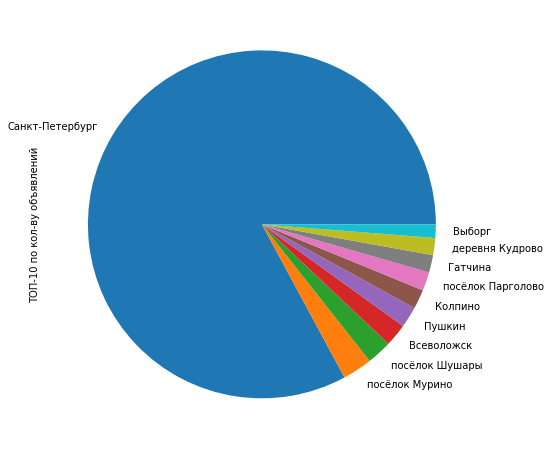

In [37]:
print(df_location.sort_values('count', ascending=False).head(10))
print(df_location.sort_values('count', ascending=False).head(10).plot(kind='pie', y='count', figsize=(8, 8), legend=False, label='ТОП-10 по кол-ву объявлений'))

The largest number of advertisements in St. Petersburg

Now let’s display the settlement with the highest and lowest valuable 1 square meter of housing

In [38]:
print(df_location.sort_values('one_metr_price_mean', ascending=False).head(1))
print()
print(df_location.sort_values('one_metr_price_mean', ascending=True).head(1))

                   one_metr_price_mean  count
locality_name                                
посёлок Лисий Нос        121616.221304      2

                    one_metr_price_mean  count
locality_name                                 
деревня Старополье         11206.221077      3


Interesting. The difference between the two settlements is more than 10 times

<b>We will create a df only with apartments in St. Petersburg</b>

In [39]:
df_saint_petersburg = df.query('locality_name == "Санкт-Петербург"')

Let's build a histogram and see how distance from the center affects the price

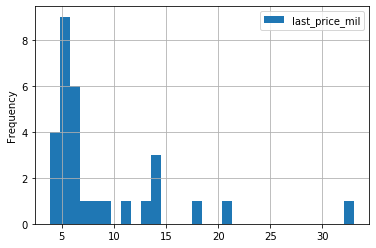

In [40]:
df_saint_petersburg_center = df_saint_petersburg.pivot_table(index='cityCenters_nearest_km', values='last_price_mil')
df_saint_petersburg_center.plot(kind='hist', y='last_price_mil', bins=30, grid=True)

The peak price occurs in the range of 0-7 km. Let's assume that this is the center

We will create a df with apartments in St. Petersburg within a 7 km radius

In [41]:
df_saint_petersburg_center_7km = df_saint_petersburg.query('cityCenters_nearest_km <= 7')

Now let's build histograms and see the price dependence

In [42]:
print(df_saint_petersburg_center_7km[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.607585  0.306242            -0.045403
total_area             0.607585    1.000000  0.724997            -0.103763
rooms                  0.306242    0.724997  1.000000            -0.181730
cityCenters_nearest   -0.045403   -0.103763 -0.181730             1.000000


The price is no longer affected by distance from the center. So 7km is the correct value.

Everything is the same, the total area influences the most

Let's see how the floor affects the price

In [43]:
print(df_saint_petersburg_center_7km.groupby('floor_description')['last_price_mil'].mean())

floor_description
Другой       14.671402
Первый        9.073137
Последний    17.065957
Name: last_price_mil, dtype: float64


The cheapest apartments also remained on the ground floor. But the most expensive apartments were the ones on the top floor

Let's see how the day of the week, month and year affect the price

In [44]:
#df_day_center = df_saint_petersburg_center_7km.groupby('day_exposition')['last_price_mil'].mean()
#df_month_center = df_saint_petersburg_center_7km.groupby('month_exposition')['last_price_mil'].mean()
#df_year_center = df_saint_petersburg_center_7km.groupby('year_exposition')['last_price_mil'].mean()

df_day_center = df_saint_petersburg_center_7km.pivot_table(index='day_exposition', values='last_price_mil')
df_month_center = df_saint_petersburg_center_7km.pivot_table(index='month_exposition', values='last_price_mil')
df_year_center = df_saint_petersburg_center_7km.pivot_table(index='year_exposition', values='last_price_mil')



print(df_day_center)
print()
print(df_month_center)
print()
print(df_year_center)

                last_price_mil
day_exposition                
Friday               14.447557
Monday               14.257825
Saturday             18.733012
Sunday               15.161635
Thursday             13.966784
Tuesday              14.080676
Wednesday            13.602053

                  last_price_mil
month_exposition                
April                  16.008337
August                 13.943881
December               15.145997
February               14.841771
January                15.171682
July                   14.340605
June                   13.750216
March                  14.137453
May                    14.230961
November               14.056173
October                12.301438
September              15.793645

                 last_price_mil
year_exposition                
2014                  25.026800
2015                  16.192596
2016                  15.549479
2017                  14.842804
2018                  12.558871
2019                  15.050451


1. Apartment advertisements posted on Saturday have the highest average price. No different from previous data
2. Apartment advertisements posted in April have the highest average price. Is different. Last time the most expensive month was September
3. Apartment advertisements posted in 2014 have the highest average price. The year is no different

For clarity, we will combine information on the time of the center of St. Petersburg and the time throughout the region

In [45]:
df_day_final = df_day_all.merge(df_day_center, on='day_exposition')
df_month_final = df_month_all.merge(df_month_center, on='month_exposition')
df_year_final = df_year_all.merge(df_year_center, on='year_exposition')

for_hist_final = [df_day_final, df_month_final, df_year_final]

for i in for_hist_final:
    i.columns = ['last_price_mil', 'last_price_mil_center']

Let's build general graphs

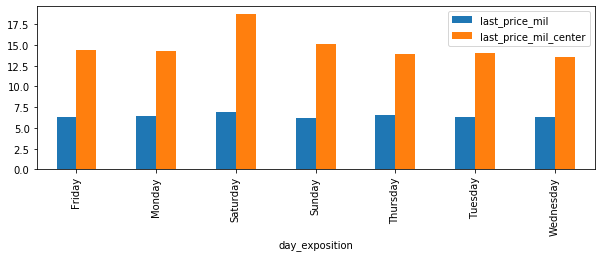

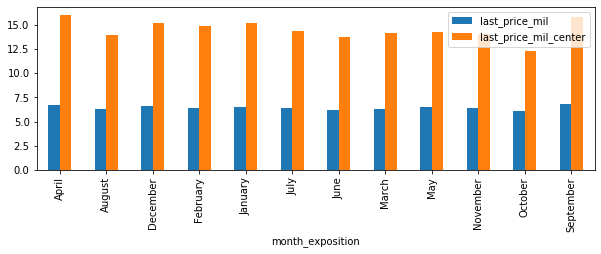

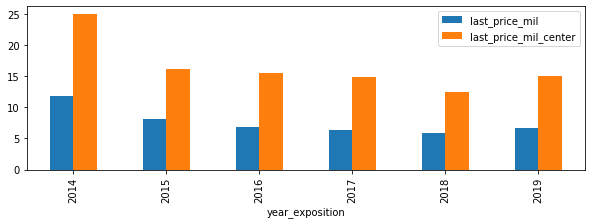

In [46]:
for i in for_hist_final:
    i.plot(figsize=(10, 3), kind='bar')

Summarize:
- apartments in the region are independent of the day of the week. For apartments in the center of St. Petersburg, the highest price fell on Saturday
- apartments in the region are not dependent on the month. There is a slight dependence in the central apartments of St. Petersburg.
- The years have the same effect on apartments in the region and the center of St. Petersburg.

## General conclusion

After analyzing the data obtained on the sale of apartments, the following conclusions can be drawn:
1. The price of an apartment depends most strongly on the total area.
2. Depends less on the number of rooms. But because The number of rooms strongly depends on the total area, and therefore the price will also depend.
3. There is a weak dependence of the price of an apartment on the center. While for apartments in St. Petersburg within 7 km from the center there is no such dependence at all.
4. The highest prices for apartments were in advertisements posted on Saturday. It is not a fact that they were deliberately bought at a higher price. Most likely, they prefer to put up expensive apartments for sale on Saturday. In the case of St. Petersburg, this is especially noticeable.
5. Also, the highest prices for apartments were in advertisements posted in September. In St. Petersburg - in April.
6. In 2014 were the highest prices for apartments. Or at this time many expensive apartments were sold.
7. Localities with the cheapest and most expensive prices per 1 square meter are also displayed.